In [1]:
from sympy import *
from sympy.stats import *

In [2]:
#worked out example

a = Symbol('\\alpha')
b = Symbol('\\beta')
c = Symbol('\\gamma')
d = Symbol('\\delta')


ss1 = 1 + (a*d  +b)**2 
ss2 = 1 + (c*b*d/(d**2 + c**2))**2 + (b*c**2/(d**2 + c**2))**2

display(simplify(ss1))
display(ss2)
display(simplify(ss2))
display((expand(simplify(ss1)-simplify(ss2))))

(\alpha*\delta + \beta)**2 + 1

\beta**2*\delta**2*\gamma**2/(\delta**2 + \gamma**2)**2 + \beta**2*\gamma**4/(\delta**2 + \gamma**2)**2 + 1

(\beta**2*\gamma**2 + \delta**2 + \gamma**2)/(\delta**2 + \gamma**2)

\alpha**2*\delta**2 + 2*\alpha*\beta*\delta - \beta**2*\gamma**2/(\delta**2 + \gamma**2) + \beta**2 - \delta**2/(\delta**2 + \gamma**2) - \gamma**2/(\delta**2 + \gamma**2) + 1

In [3]:
#worked out example

a = Symbol('\\alpha')
b = Symbol('\\beta')
c = Symbol('\\gamma')
d = Symbol('\\delta')
z = Normal('z',0,1)
w = Normal('w',0,1)
e = Normal('e',0,1)
x = c*z + d*w
y = a*x + b*w + e



def proj_coef(y,x):
    x*x.transpose()
    bproj = E(x*x.transpose())**(-1)*E(x*y)
    return bproj


Z = Matrix([[1],[z]])
bproj1 = proj_coef(y,Z)
print(bproj1)
e1 = Matrix([[y]]) - Z.transpose()*bproj1
print('error1',e1[0,0])
display('error1',simplify(  factor( e1[0,0], w)) )
      
X = Matrix([[1],[x]])
bproj2 = proj_coef(y,X)
print(bproj2)
display(bproj2[1,0])
e2 = Matrix([[y]]) - X.transpose()*bproj2
e2 = simplify(e2[0,0])
e2 = factor(e2,(w,z,e))

display('error2',e2)
print('error2',e2)
#note that the mse is proprotional to likelihood...

#https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf

Matrix([[0], [\alpha*\gamma]])
error1 -\alpha*\gamma*z + \alpha*(\delta*w + \gamma*z) + \beta*w + e


'error1'

(\alpha*\delta + \beta)*w + e

Matrix([[0], [(\alpha*\delta**2 + \alpha*\gamma**2 + \beta*\delta)/(\delta**2 + \gamma**2)]])


(\alpha*\delta**2 + \alpha*\gamma**2 + \beta*\delta)/(\delta**2 + \gamma**2)

'error2'

(-\beta*\delta*\gamma*z + \beta*\gamma**2*w + (\delta**2 + \gamma**2)*e)/(\delta**2 + \gamma**2)

error2 (-\beta*\delta*\gamma*z + \beta*\gamma**2*w + (\delta**2 + \gamma**2)*e)/(\delta**2 + \gamma**2)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
import scipy.stats as stats

In [34]:
def gen_data(nobs = 10000,
                    a = 1,
                    b = 1,
                    c = 1,
                    d = -1,
                    varz = 1,
                    varw = 1,
                    vare = 1):
    
    z = np.random.normal(0,varz,nobs)
    w = np.random.normal(0,varw,nobs)
    e = np.random.normal(0,vare,nobs)
    
    x = c*z + d*w
    y = a*x + b*w + e

    return y,x,z

    
def setup_model(yn,xn):
    """setup models for ease"""
    model1 = sm.OLS(yn,sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    print(model1_fit.resid.var())
    return -1/2*np.log(2*np.pi) - np.log(model1_fit.resid.std()) -1/2


def setup_y(yn,xn):
    """setup models for ease"""
    model1 = sm.OLS(yn,sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    return model1_fit.fittedvalues

def plot_stuff(nobs = 10000,
                    a = 1,
                    b = 1,
                    c = 1,
                    d = -1):
    y,x,z = gen_data(nobs = nobs,
                    a = a,
                    b = b,
                    c = c,
                    d = d)
    y1 = setup_y(y,x)
    y2 = setup_y(y,z)
    plt.xlabel('z')
    plt.ylabel('y')
    plt.scatter(y,z,marker=".",alpha=.8,color='green')
    plt.scatter(y1,z,label="x",marker=".",alpha=.8,color='orange')
    plt.scatter(y2,z,label="z",marker=".",alpha=.8,color='blue')
    plt.legend()
    plt.show()

    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(y,x,marker=".",alpha=.8,color='green')
    plt.scatter(y2,x,label="z",marker=".",alpha=.8,color='blue')
    plt.scatter(y1,x,label="x",marker=".",alpha=.8,color='orange')
    plt.legend()
    plt.show()
    print(setup_model(y,z)-setup_model(y,x))

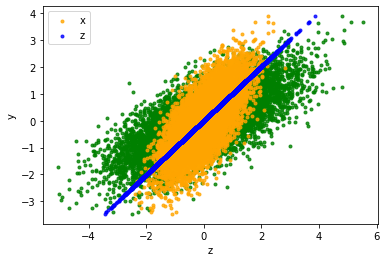

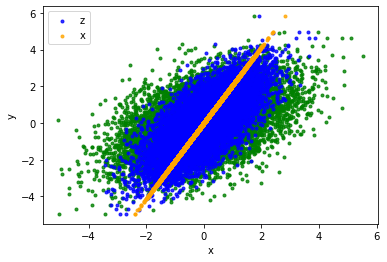

0.9912737026216675
1.4769988766024829
0.19938841871171875


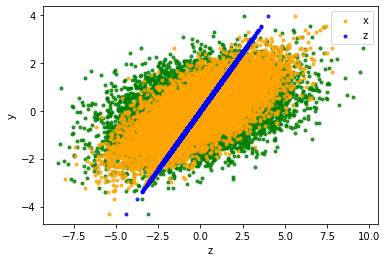

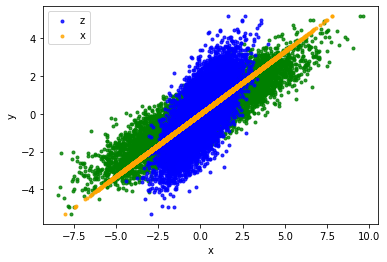

5.047740435073657
1.4907265790953768
-0.6098385332398077


In [35]:
plot_stuff(d=-1)
plot_stuff(d=1)